In this assignment students will build the random forest model after normalizing the variable to house pricing from boston data set. <br>
Following the code to get data into the environment: <br>
import numpy as np <br>
import pandas as pd <br>
import matplotlib.pyplot as plt <br>
import seaborn as sns <br>
from sklearn.model_selection import train_test_split <br>
from sklearn.preprocessing import StandardScaler <br>
from sklearn import datasets  <br> <br>
boston = datasets.load_boston() <br>
features = pd.DataFrame(boston.data, columns=boston.feature_names) <br>
targets = boston.target

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = datasets.load_boston()
b1 = pd.DataFrame(df.data, columns=df.feature_names)
b2 = pd.DataFrame(df.target,columns=['MEDV'])
boston = pd.concat([b1,b2],axis=1)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
boston.corr()[-1:]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
MEDV,-0.388305,0.360445,-0.483725,0.17526,-0.427321,0.69536,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663,1.0


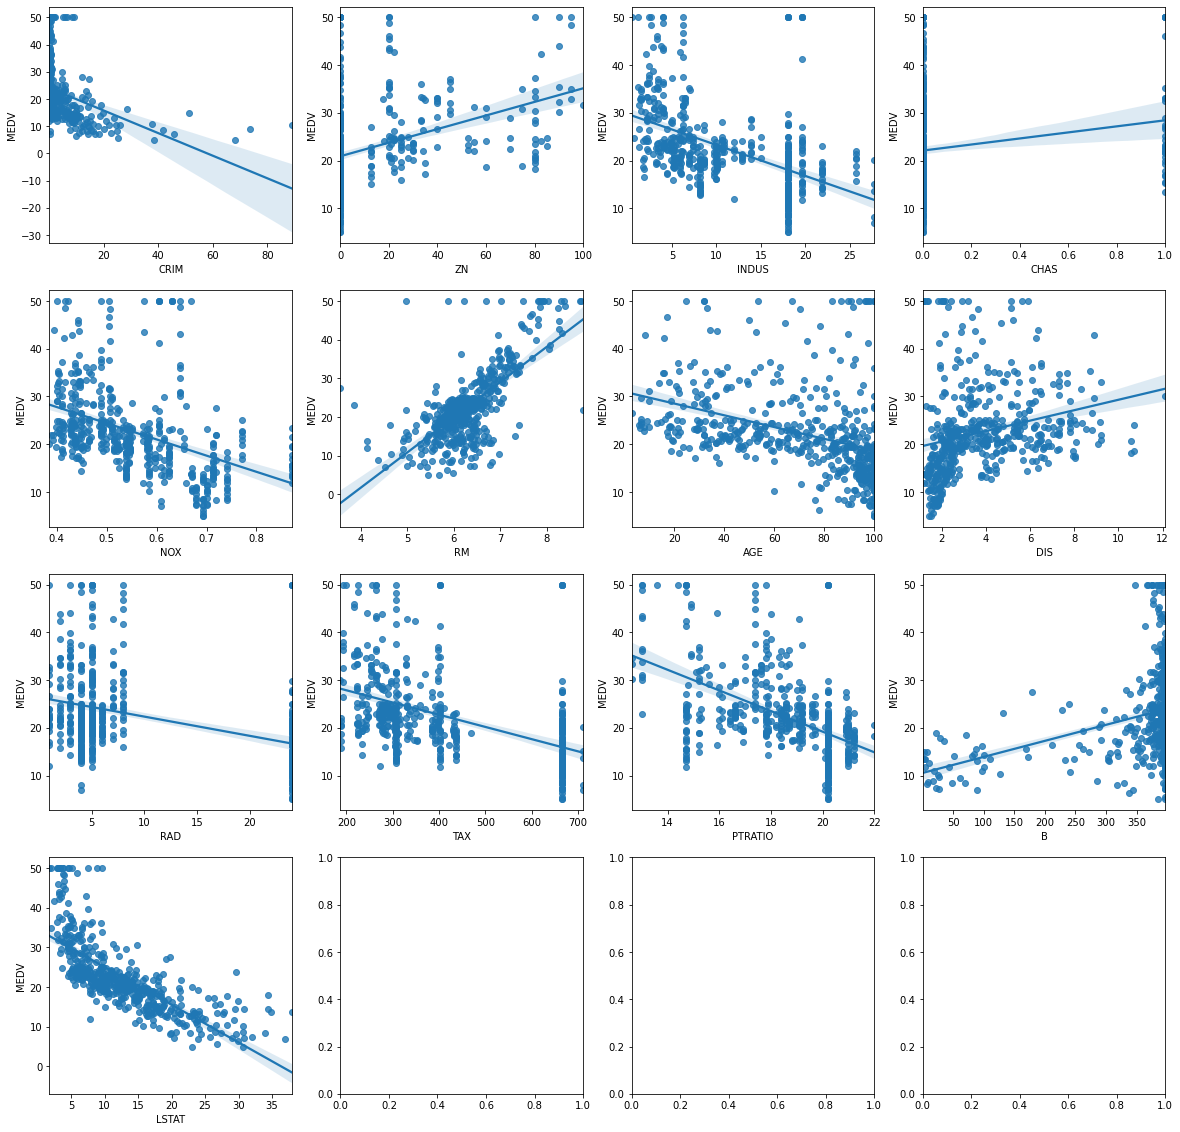

In [6]:
fig, ax = plt.subplots(4,4,figsize=(20,20))
a = 0
for i in range(0,4):
    for j in range(0,4):
        if a <= 12:
            sns.regplot(x=boston.iloc[:,a],y=boston['MEDV'],data=boston,ax=ax[i,j])
            a = a + 1

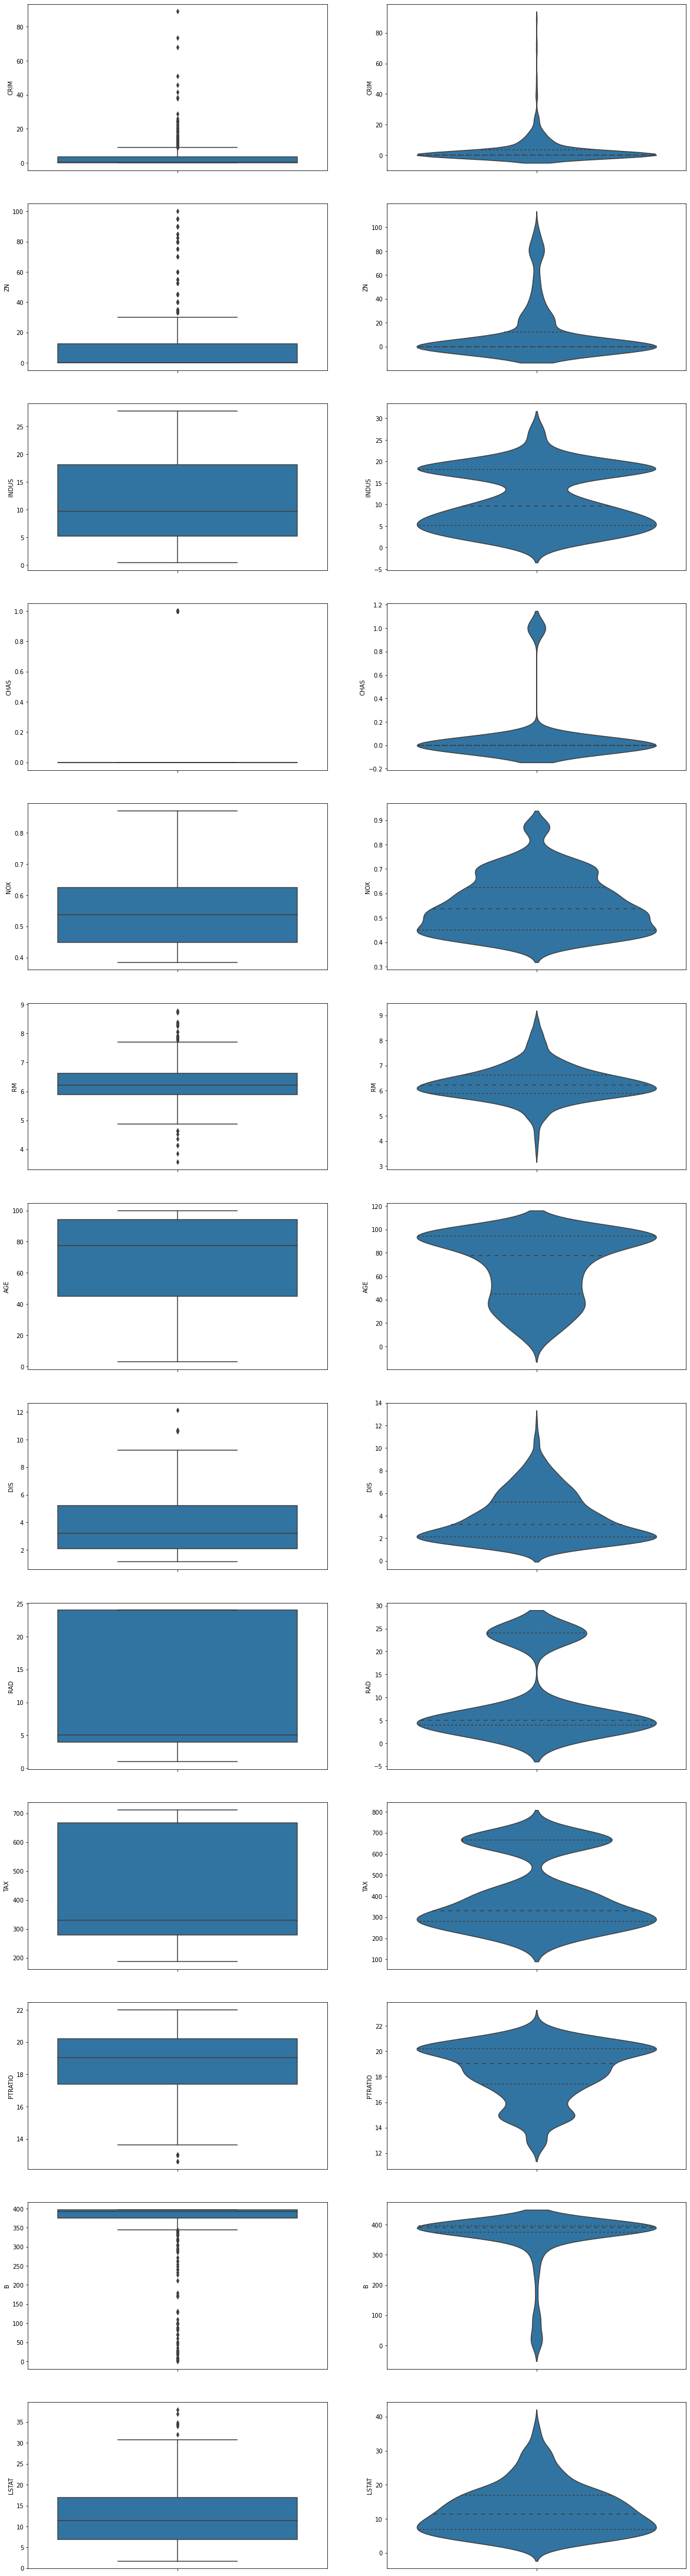

In [7]:
fig, ax = plt.subplots(13,2,figsize=(20,80))
a = 0
for i in range(0,13):
    if a <= 13:
        sns.boxplot(y=boston.iloc[:,a],data=boston,ax=ax[i,0])
        sns.violinplot(y=boston.iloc[:,a],data=boston,inner='quartile',ax=ax[i,1])
        a = a + 1

In [8]:
for a in boston.columns:
    print(a, len(boston[boston[a] == 0]))

CRIM 0
ZN 372
INDUS 0
CHAS 471
NOX 0
RM 0
AGE 0
DIS 0
RAD 0
TAX 0
PTRATIO 0
B 0
LSTAT 0
MEDV 0


In [9]:
X = boston.drop('MEDV',axis=1)
y = pd.DataFrame(boston['MEDV'])

X = MinMaxScaler().fit_transform(X)
y = MinMaxScaler().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rf = RandomForestRegressor(n_estimators=337, max_depth=12, min_samples_split=22, min_samples_leaf=2, max_features=8, max_leaf_nodes=131)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(round(mean_absolute_error(y_test,y_pred),4), round(mean_squared_error(y_test,y_pred),4))

0.0482 0.0061
